In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate

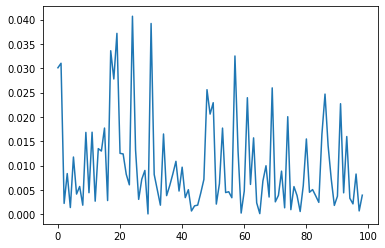

In [2]:
N = 100
nodes = np.linspace(0, 1 , N)
h = np.diff(nodes)

nodes = np.sort(np.random.random((N)))
nodes[0] = 0.0
nodes[-1] = 1.0
h = np.diff(nodes)


plt.plot(h)

In [3]:
ua = 0
ub = 1

def rho(x):
    return x * 0.25 / np.pi


In [4]:
def phi(i, x):
    #i = i % nodes.size
    
    if x < nodes[i-1] or x > nodes[i+1]:
        return 0
    if x <= nodes[i]:
        return (x - nodes[i-1]) / h[i-1]
    return 1 - (x - nodes[i]) / h[i]

In [5]:
# x = np.linspace(0, 1, 100)
# y = []
# for x_ in x:
#     y.append(phi(-2, x_))
# plt.plot(x,y)

In [6]:
A = np.zeros((nodes.size - 2, nodes.size - 2))

for i in range(A.shape[0]):
    A[i, i] = 1 / h[i] + 1 / h[i+1]
    if i < A.shape[0] - 1:
        A[i, i+1] = -1 / h[i+1] 
    if i > 0:
        A[i, i-1] = -1 / h[i]

plt.imshow(A)

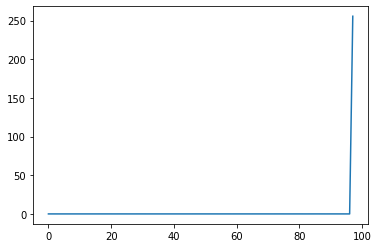

In [7]:
b = []
for i in range(1, nodes.size - 1):
    def integrand(x):
        return 4 * np.pi* rho(x) * phi(i, x)
    lim0 = nodes[i-1]
    lim1 = nodes[i+1]
    integral = scipy.integrate.quad(integrand, lim0, lim1)[0]
    b.append(integral)
b = np.asarray(b)

b[0] += -ua / h[0]
b[-1] += ub / h[-1]

plt.plot(b)

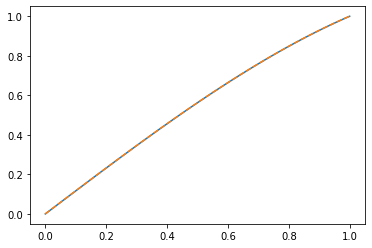

In [9]:
y = np.linalg.solve(A, b)
y = np.append(np.append([ua], y), [ub])
plt.plot(nodes, y)
x = nodes
# plt.plot(x, -x * (x - 3) / 2, '--')
plt.plot(x, -x ** 3 / 6 + 7 * x / 6, '--')